<a href="https://colab.research.google.com/github/Shubham-naik-ai/Reunion/blob/main/Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part-2**

**Develop the ML model(s) to predict the credit risk(low or high) for a given applicant.** 

**Business Constraint:** Note that it is worse to state an applicant as a low credit risk when they are actually a high risk, than it is to state an applicant to be a high credit risk when they aren’t.

In [7]:
# Importing usefull libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/MyDrive/Reunion/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Importing usefull libraries


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC


In [9]:
#Loading the Dataset
train_df = pd.read_csv(working_dir_path + 'finaldata.csv')

In [10]:
train_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,empd_for_atleast,Has_been_employed_for_at_most,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_prcnt,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,7+ years,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,24,new vehicle,4870000,3,building society savings agreement/life insurance,0,0,2,delay in paying off loans in the past,1


In [11]:
# Using Label encoder on categorical columns

train_df[['Gender', 'Marital_status', 'Housing','Employment_status','empd_for_atleast','Has_been_employed_for_at_most','Savings_account_balance','A/c balance lower','A/c balance upper','Purpose','Property','Loan_history']] = train_df[['Gender', 'Marital_status', 'Housing','Employment_status','empd_for_atleast','Has_been_employed_for_at_most','Savings_account_balance','A/c balance lower','A/c balance upper','Purpose','Property','Loan_history']].apply(LabelEncoder().fit_transform)

In [12]:
columns_to_keep = ['Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status', 'empd_for_atleast',
       'Has_been_employed_for_at_most', 'Foreign_worker',
       'Savings_account_balance', 'A/c balance lower', 'A/c balance upper',
       'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_prcnt', 'Property',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant']

In [13]:
train_df = train_df[columns_to_keep]

In [14]:
train_df.columns

Index(['Primary_applicant_age_in_years', 'Gender', 'Marital_status',
       'Number_of_dependents', 'Housing', 'Years_at_current_residence',
       'Employment_status', 'empd_for_atleast',
       'Has_been_employed_for_at_most', 'Foreign_worker',
       'Savings_account_balance', 'A/c balance lower', 'A/c balance upper',
       'Months_loan_taken_for', 'Purpose', 'Principal_loan_amount',
       'EMI_rate_prcnt', 'Property', 'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Primary_applicant_age_in_years         988 non-null    int64
 1   Gender                                 988 non-null    int64
 2   Marital_status                         988 non-null    int64
 3   Number_of_dependents                   988 non-null    int64
 4   Housing                                988 non-null    int64
 5   Years_at_current_residence             988 non-null    int64
 6   Employment_status                      988 non-null    int64
 7   empd_for_atleast                       988 non-null    int64
 8   Has_been_employed_for_at_most          988 non-null    int64
 9   Foreign_worker                         988 non-null    int64
 10  Savings_account_balance                988 non-null    int64
 11  A/c balance lower               

## **As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)**

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(train_df.iloc[:,0:-1], train_df['high_risk_applicant'])

print('Original dataset shape', len(train_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 988
Resampled dataset shape 1386


In [17]:
x_smote

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,empd_for_atleast,Has_been_employed_for_at_most,Foreign_worker,...,A/c balance upper,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_prcnt,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
0,67,1,3,1,1,4,1,3,4,1,...,0,6,5,1169000,4,2,0,0,2,1
1,22,0,1,1,1,2,1,1,2,1,...,1,48,5,5951000,2,2,0,0,1,3
2,49,1,3,2,1,3,3,2,3,1,...,0,12,4,2096000,2,2,0,0,1,1
3,45,1,3,2,0,4,1,2,3,1,...,0,42,0,7882000,2,0,0,1,1,3
4,53,1,3,2,0,4,1,1,2,1,...,0,24,6,4870000,3,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,42,1,3,2,0,3,1,1,2,1,...,0,41,4,3925761,4,0,0,0,1,3
1382,33,0,2,1,1,2,0,0,0,1,...,0,18,5,6840044,1,0,0,0,1,0
1383,23,0,1,1,1,3,1,0,1,1,...,0,18,6,1940451,4,2,0,0,1,3
1384,35,0,2,1,0,4,1,1,2,1,...,0,30,4,1827180,4,0,0,0,1,1


In [18]:
columns = list(train_df.columns)

In [19]:
columns.pop()


'high_risk_applicant'

In [20]:
balance_df = pd.DataFrame(x_smote, columns=columns)


In [21]:
balance_df['high_risk_applicant'] = y_smote


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


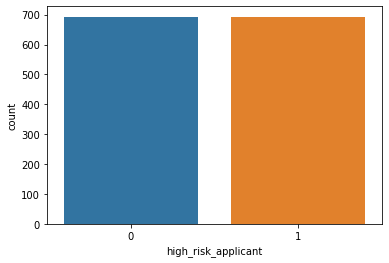

In [22]:
sns.countplot('high_risk_applicant', data = balance_df)


In [23]:
balance_df[balance_df['high_risk_applicant']==1]

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,empd_for_atleast,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_prcnt,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
1,22,0,1,1,1,2,1,1,2,1,...,48,5,5951000,2,2,0,0,1,3,1
4,53,1,3,2,0,4,1,1,2,1,...,24,6,4870000,3,0,0,0,2,2,1
9,28,1,2,1,1,2,0,0,0,1,...,30,6,5234000,4,1,0,0,2,1,1
10,25,0,1,1,2,1,1,0,1,1,...,12,6,1295000,3,1,0,0,1,3,1
11,24,0,1,1,2,4,1,0,1,1,...,48,1,4308000,3,0,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,42,1,3,2,0,3,1,1,2,1,...,41,4,3925761,4,0,0,0,1,3,1
1382,33,0,2,1,1,2,0,0,0,1,...,18,5,6840044,1,0,0,0,1,0,1
1383,23,0,1,1,1,3,1,0,1,1,...,18,6,1940451,4,2,0,0,1,3,1
1384,35,0,2,1,0,4,1,1,2,1,...,30,4,1827180,4,0,0,0,1,1,1


In [24]:
train_df = balance_df.copy()

In [25]:
train_df.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,empd_for_atleast,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_prcnt,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,1,3,1,1,4,1,3,4,1,...,6,5,1169000,4,2,0,0,2,1,0
1,22,0,1,1,1,2,1,1,2,1,...,48,5,5951000,2,2,0,0,1,3,1
2,49,1,3,2,1,3,3,2,3,1,...,12,4,2096000,2,2,0,0,1,1,0
3,45,1,3,2,0,4,1,2,3,1,...,42,0,7882000,2,0,0,1,1,3,0
4,53,1,3,2,0,4,1,1,2,1,...,24,6,4870000,3,0,0,0,2,2,1


In [26]:
train_df = train_df[columns_to_keep]

In [27]:
train_df.columns

Index(['Primary_applicant_age_in_years', 'Gender', 'Marital_status',
       'Number_of_dependents', 'Housing', 'Years_at_current_residence',
       'Employment_status', 'empd_for_atleast',
       'Has_been_employed_for_at_most', 'Foreign_worker',
       'Savings_account_balance', 'A/c balance lower', 'A/c balance upper',
       'Months_loan_taken_for', 'Purpose', 'Principal_loan_amount',
       'EMI_rate_prcnt', 'Property', 'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [28]:
features = ['Primary_applicant_age_in_years', 'Gender', 'Marital_status',
       'Number_of_dependents', 'Housing', 'Years_at_current_residence',
       'Employment_status', 'empd_for_atleast',
       'Has_been_employed_for_at_most', 'Foreign_worker',
       'Savings_account_balance', 'A/c balance lower', 'A/c balance upper',
       'Months_loan_taken_for', 'Purpose', 'Principal_loan_amount',
       'EMI_rate_prcnt', 'Property', 'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history']

In [29]:
# Displaying features
features

['Primary_applicant_age_in_years',
 'Gender',
 'Marital_status',
 'Number_of_dependents',
 'Housing',
 'Years_at_current_residence',
 'Employment_status',
 'empd_for_atleast',
 'Has_been_employed_for_at_most',
 'Foreign_worker',
 'Savings_account_balance',
 'A/c balance lower',
 'A/c balance upper',
 'Months_loan_taken_for',
 'Purpose',
 'Principal_loan_amount',
 'EMI_rate_prcnt',
 'Property',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank',
 'Loan_history']

In [30]:
from sklearn import preprocessing

In [31]:
dataset_pr = train_df.copy()

In [32]:
from scipy.stats import zscore

X = dataset_pr[features].apply(zscore)

In [33]:
y = train_df['high_risk_applicant']

In [34]:
X.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,empd_for_atleast,Has_been_employed_for_at_most,Foreign_worker,...,A/c balance upper,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_prcnt,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
0,2.963789,0.801361,0.972003,-0.362531,-0.018901,1.194986,-0.217640,1.616738,1.529987,0.176777,...,-0.537868,-1.318338,0.374993,-0.743002,0.982627,1.441450,-0.165613,-0.195454,1.219133,-1.119473
1,-1.205732,-1.247876,-1.007712,-0.362531,-0.018901,-0.687117,-0.217640,-0.258407,-0.175330,0.176777,...,1.859191,2.267285,0.374993,0.908501,-0.847912,1.441450,-0.165613,-0.195454,-0.613533,0.777336
2,1.295981,0.801361,0.972003,2.758386,-0.018901,0.253935,1.992247,0.679165,0.677328,0.176777,...,-0.537868,-0.806106,-0.022970,-0.422855,-0.847912,1.441450,-0.165613,-0.195454,-0.613533,-1.119473
3,0.925357,0.801361,0.972003,2.758386,-1.890063,1.194986,-0.217640,0.679165,0.677328,0.176777,...,-0.537868,1.755053,-1.614825,1.575388,-0.847912,-1.105203,-0.165613,5.116295,-0.613533,0.777336
4,1.666605,0.801361,0.972003,2.758386,-1.890063,1.194986,-0.217640,-0.258407,-0.175330,0.176777,...,-0.537868,0.218358,0.772957,0.535169,0.067358,-1.105203,-0.165613,-0.195454,1.219133,-0.171069


In [35]:
X = train_df.drop(['high_risk_applicant'],axis=1)
y = train_df['high_risk_applicant']

In [36]:
columns = X.columns

In [37]:
# Using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [39]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [40]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [41]:
optimized_clf = grid_lr_clf.best_estimator_

In [42]:
# Displaying the best parameters
grid_lr_clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [43]:
# Displaying the best score
grid_lr_clf.best_score_

0.7040859228681725

In [44]:
# Predicted Probability

train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [45]:
# Get the predicted classes

train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [46]:
# Get the accuracy scores

train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7268041237113402
The accuracy on test data is  0.6875


In [47]:
# Displaying the accuracy

test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.6875
The precision on test data is  0.6923076923076923
The recall on test data is  0.6857142857142857
The f1 on test data is  0.6889952153110047
The roc_score on test data is  0.6875173370319002


[[341 144]
 [121 364]]


[Text(0, 0.5, 'Low Risk'), Text(0, 1.5, 'High Risk')]

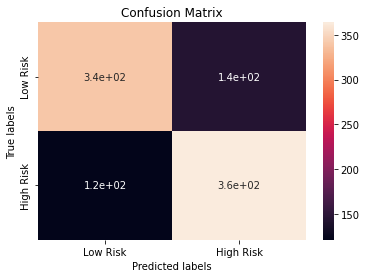

In [48]:
# Get the confusion matrix for both train and test

labels = ['Low Risk', 'High Risk']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [49]:
# Finding the important features
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [50]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

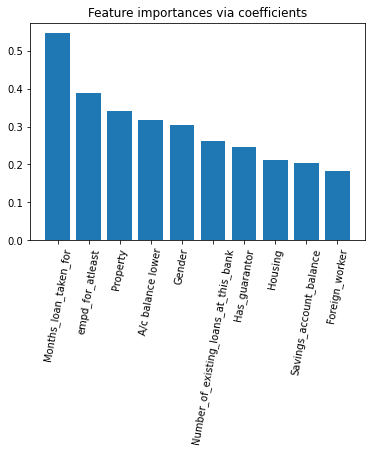

In [51]:
# Bar plot showing the importance of each feature
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [52]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

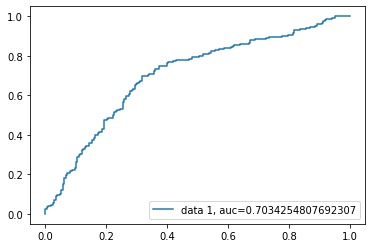

In [53]:
# Plotting the ROC-AUC curve
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Implementing SVC**

In [54]:
# defining parameter range 

param_grid = {'C': [0.1, 1, 10, 100],'kernel': ['rbf']} 

In [55]:
X = train_df.drop(['high_risk_applicant'],axis=1)
y = train_df['high_risk_applicant']

In [56]:
# Using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [57]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [58]:
# using the GridSearchCV
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [59]:
# Finding the best estimators
optimal_SVC_clf = grid_clf.best_estimator_

In [60]:
# Finding the best parameters
grid_clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [61]:
# Displaying the best score
grid_clf.best_score_

0.7576985310043445

In [62]:
# Get the predicted classes

train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [63]:
# Get the accuracy scores

train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7268041237113402
The accuracy on test data is  0.6875


In [64]:
# Displaying accuracy of precision, recall, F1 and Roc-Auc

test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.7211538461538461
The precision on test data is  0.7307692307692307
The recall on test data is  0.7169811320754716
The f1 on test data is  0.7238095238095238
The roc_score on test data is  0.7212356640769515


[[462  23]
 [ 16 469]]


[Text(0, 0.5, 'Low Risk'), Text(0, 1.5, 'High Risk')]

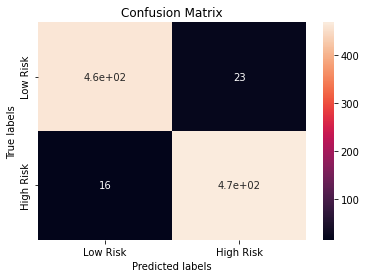

In [65]:
# Get the confusion matrix for both train and test

labels = ['Low Risk', 'High Risk']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [66]:
# Get the predicted classes

train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [67]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

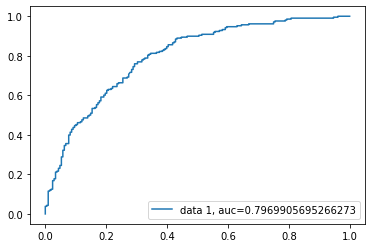

In [68]:
# ROC AUC CURVE

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Implementing Decision Tree Classifier**

In [69]:
# Assigning parameters
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [70]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier  

In [71]:
X = train_df.drop(['high_risk_applicant'],axis=1)
y = train_df['high_risk_applicant']

In [72]:
# Training the model
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [73]:
# Displaying the best score
grid_DTC_clf.best_score_

0.6381308208793589

In [74]:
# Finding the best estimator
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [75]:
# Get the predicted classes

train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [76]:
# Displaying the best parameters
grid_DTC_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.1}

In [77]:
# Get the accuracy scores

train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.7123711340206186
The accuracy on test data is  0.6586538461538461


In [78]:
# Display the accuracy scores for Precision, Recall, F1 and ROC_AUC

test_accuracy_DTC = accuracy_score(test_class_preds,y_test)
test_precision_score_DTC = precision_score(test_class_preds,y_test)
test_recall_score_DTC = recall_score(test_class_preds,y_test)
test_f1_score_DTC = f1_score(test_class_preds,y_test)
test_roc_score_DTC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_DTC)
print("The precision on test data is ", test_precision_score_DTC)
print("The recall on test data is ", test_recall_score_DTC)
print("The f1 on test data is ", test_f1_score_DTC)
print("The roc_score on test data is ", test_roc_score_DTC)

The accuracy on test data is  0.6586538461538461
The precision on test data is  0.6442307692307693
The recall on test data is  0.6633663366336634
The f1 on test data is  0.6536585365853659
The roc_score on test data is  0.6587859720551497


[[365 120]
 [159 326]]


[Text(0, 0.5, 'Low Risk'), Text(0, 1.5, 'High Risk')]

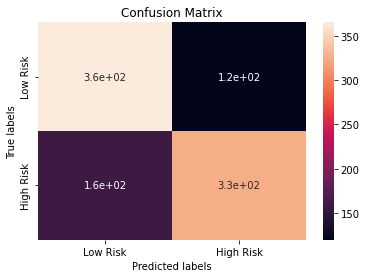

In [79]:
# Get the confusion matrix for both train and test

labels = ['Low Risk', 'High Risk']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [80]:
len(optimal_DTC_clf.feature_importances_)

22

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  # Remove the CWD from sys.path while we load stuff.


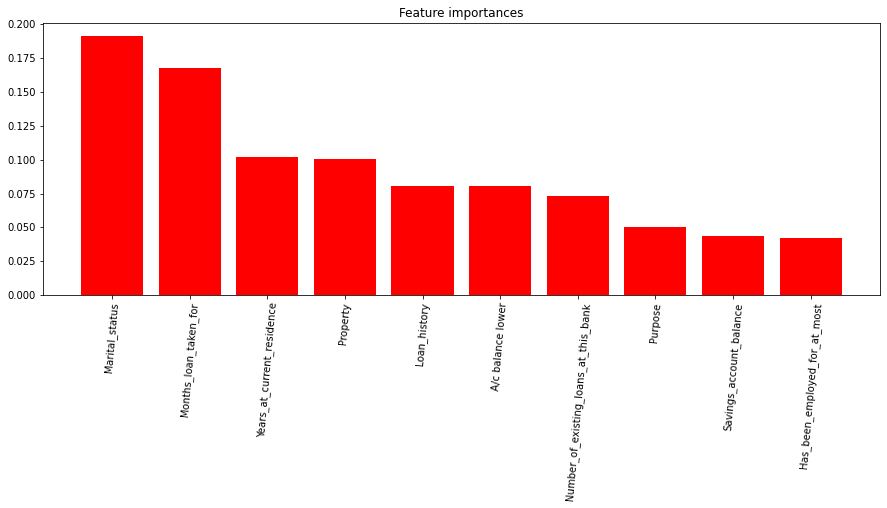

In [81]:
# Feature Importance
feature_importances_DTC = pd.DataFrame(optimal_DTC_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(15,5))
plt.title("Feature importances")
plt.bar(feature_importances_DTC.index, feature_importances_DTC['importance_rf'],
        color="R",  align="center")
plt.xticks(feature_importances_DTC.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

# **Implementing RandomForest**

In [82]:
# Importing the Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

In [83]:
X = train_df.drop(['high_risk_applicant'],axis=1)
y = train_df['high_risk_applicant']

In [84]:
# Training the model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [85]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [86]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  0.7475961538461539


In [87]:
# Display the accuracy scores for Precision, Recall, F1 and ROC_AUC

test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.7475961538461539
The precision on test data is  0.7115384615384616
The recall on test data is  0.7668393782383419
The f1 on test data is  0.7381546134663343
The roc_score on test data is  0.7488905411371083


[[485   0]
 [  0 485]]


[Text(0, 0.5, 'Low Risk'), Text(0, 1.5, 'High Risk')]

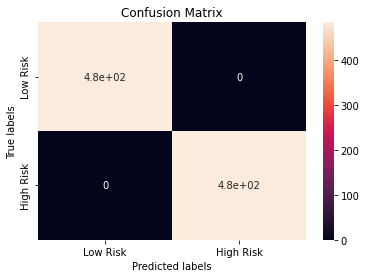

In [88]:
  # Get the confusion matrix for both train and test

labels = ['Low Risk', 'High Risk']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [89]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [90]:
# Using the Grid Search CV
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [91]:
# Displaying the best score
grid_rf_clf.best_score_

0.7772936335027838

In [92]:
# Finding the best parameters
grid_rf_clf.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [93]:
# Displaying the best estimator
optimal_rf_clf = grid_rf_clf.best_estimator_

In [94]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [95]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  0.7716346153846154


In [96]:
# Display the accuracy scores for Precision, Recall, F1 and ROC_AUC

test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.7716346153846154
The precision on test data is  0.7644230769230769
The recall on test data is  0.775609756097561
The f1 on test data is  0.7699757869249394
The roc_score on test data is  0.7716911339729511


[[485   0]
 [  0 485]]


[Text(0, 0.5, 'Low Risk'), Text(0, 1.5, 'High Risk')]

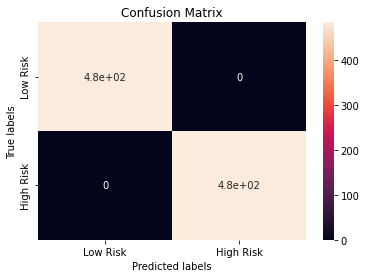

In [97]:
# Get the confusion matrix for both train and test

labels = ['Low Risk', 'High Risk']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [98]:
len(optimal_rf_clf.feature_importances_)

22

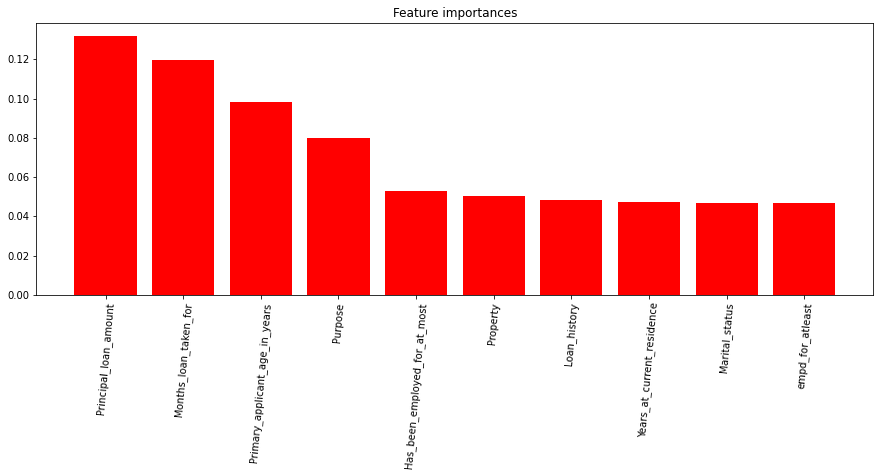

In [99]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(15,5))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="R",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [100]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [101]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

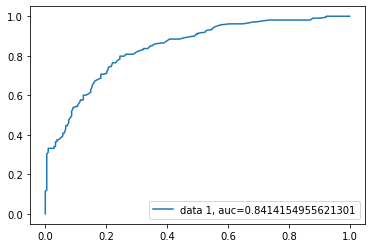

In [102]:
# Displaying the ROC-AUC Curve

y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Implementing XGBoost**

In [103]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

In [104]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [105]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [106]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

In [107]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(microseconds=239779)

In [108]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 

#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [109]:
len(train_class_preds_probs)

970

In [110]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [111]:
test_class_preds_probs[:20]

array([0.61659396, 0.49745238, 0.4518117 , 0.40987667, 0.149721  ,
       0.35476965, 0.7472296 , 0.75439036, 0.8312844 , 0.2506669 ,
       0.4802749 , 0.78327245, 0.837654  , 0.7317682 , 0.37389338,
       0.5300132 , 0.7291484 , 0.8367569 , 0.30759233, 0.4319474 ],
      dtype=float32)

In [112]:
test_class_preds[:20]

[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]

In [113]:
len(y_train)

970

In [114]:
len(train_class_preds)

970

In [115]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9443298969072165
The accuracy on test data is  0.7548076923076923


In [116]:
# Display the accuracy scores for Precision, Recall, F1 and ROC_AUC

test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.7548076923076923
The precision on test data is  0.7403846153846154
The recall on test data is  0.7623762376237624
The f1 on test data is  0.751219512195122
The roc_score on train data is  0.7550198945128158


[[459  26]
 [ 28 457]]


[Text(0, 0.5, 'Low Risk'), Text(0, 1.5, 'High Risk')]

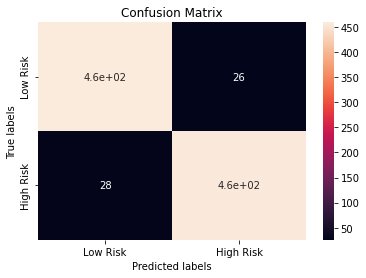

In [117]:
# Get the confusion matrix for both train and test

labels = ['Low Risk', 'High Risk']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Hyperparameter Tuning**

In [118]:
# Importing the XGB Classifier
from xgboost import  XGBClassifier

In [119]:
X = train_df.drop(['high_risk_applicant'],axis=1)
y = train_df['high_risk_applicant']

In [120]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [121]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [122]:
# Finding the best score
gsearch1.best_score_

0.7845016499127265

In [123]:
# Finding the best estimator
optimal_xgb = gsearch1.best_estimator_

In [124]:
gsearch1.best_params_

{'max_depth': 5, 'min_child_weight': 1}

In [125]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [126]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9824742268041237
The accuracy on test data is  0.75


In [127]:
# Display the accuracy scores for Precision, Recall, F1 and ROC_AUC

test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.75
The precision on test data is  0.7451923076923077
The recall on test data is  0.7524271844660194
The f1 on test data is  0.7487922705314008
The roc_score on train data is  0.7500231160425335


[[478   7]
 [ 10 475]]


[Text(0, 0.5, 'Low Risk'), Text(0, 1.5, 'High Risk')]

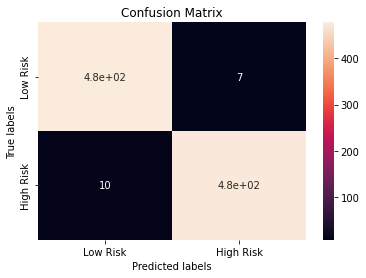

In [128]:
# Get the confusion matrix for both train and test

labels = ['Low Risk', 'High Risk']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [129]:
len(optimal_xgb.feature_importances_)

22

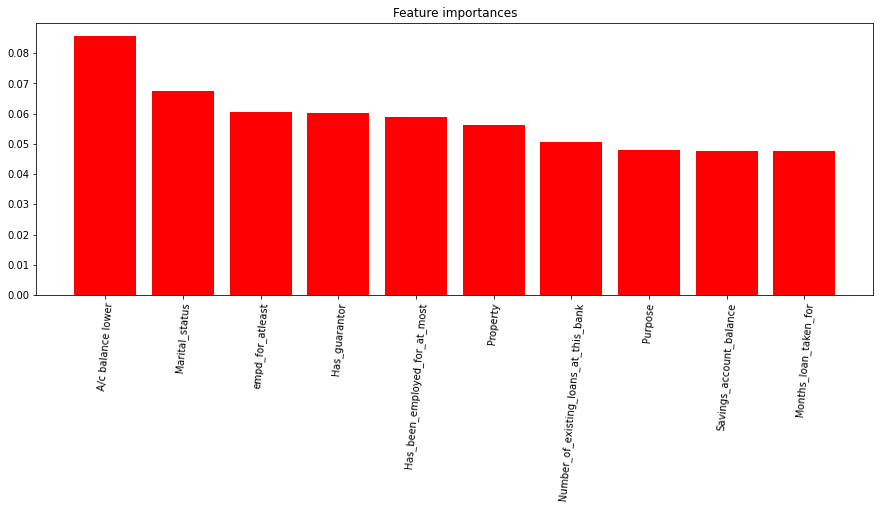

In [130]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(15,5))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_rf'],
        color="R",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [131]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

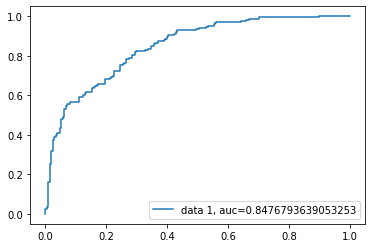

In [132]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [133]:
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [134]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 score': f1_score})


,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 score
0,Logistic Regression,0.726804,0.687500,0.692308,0.685714,0.688995
1,SVC,0.959794,0.721154,0.730769,0.716981,0.723810
2,Random Forest CLf,1.000000,0.771635,0.764423,0.775610,0.769976
3,Xgboost Clf,0.982474,0.750000,0.745192,0.752427,0.748792


In [135]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf,y_pred_proba_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [136]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.004807692307692308, 0.004807...","[0.0, 0.004807692307692308, 0.0240384615384615...",0.703425
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.004807692307692308, 0.0144230769230769...",0.841415
XGBClassifier,"[0.0, 0.0, 0.0, 0.004807692307692308, 0.004807...","[0.0, 0.004807692307692308, 0.0240384615384615...",0.847679
SVC,"[0.0, 0.0, 0.0, 0.004807692307692308, 0.004807...","[0.0, 0.004807692307692308, 0.0384615384615384...",0.796991


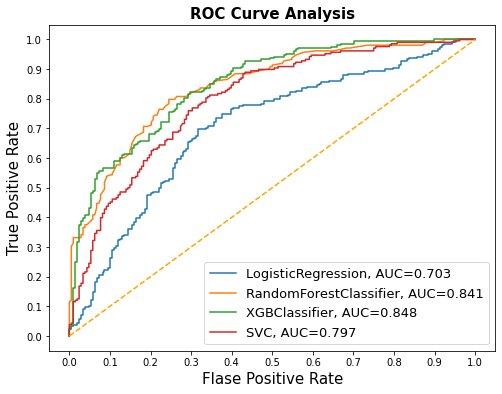

In [137]:
# Plotting the ROC-AUC Curve

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# **Conclusion**

• XGBoost provided us the best results giving us a recall of 75 percent (meaning out of 100 risk applicants 75 will be having high chances of paying loan back)

• Random Forest also had good score as well as well but leads to overfit the data.

• Logistic regression being the least accurate with a recall of 68.